<a href="https://colab.research.google.com/github/somanathrotte/Circuit_Design_AI_Project/blob/main/Copy_of_SA_VLSI_Floorplanning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['S1', 'S2', 'V', 'S3', 'V', 'S4', 'V', 'S5', 'V', 'S6', 'V', 'S7', 'V', 'S8', 'V', 'S9', 'V', 'S10', 'V', 'S11', 'V', 'S12', 'V', 'S13', 'V']
Ideal area 		:  27640
area / Ideal area 	:  1.9862518089725036
area / Ideal area 	:  1.918958031837916


<ipython-input-3-413c18275c74>:220: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(datetime.now())


area / Ideal area 	:  1.7973950795947902
area / Ideal area 	:  1.7322720694645442
area / Ideal area 	:  1.606367583212735
area / Ideal area 	:  1.5311143270622287
area / Ideal area 	:  1.4327062228654124
area / Ideal area 	:  1.3314037626628075
area / Ideal area 	:  1.3285094066570189
area / Ideal area 	:  1.2981186685962374


KeyboardInterrupt: ignored

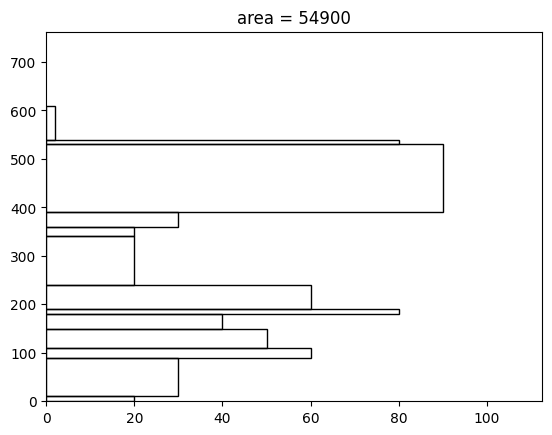

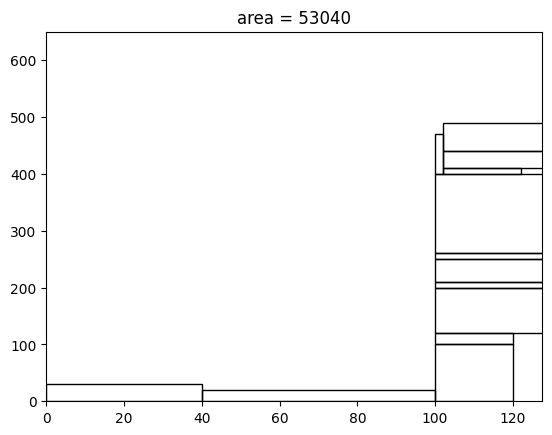

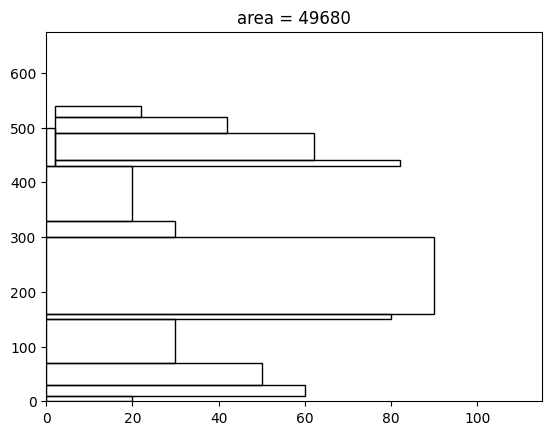

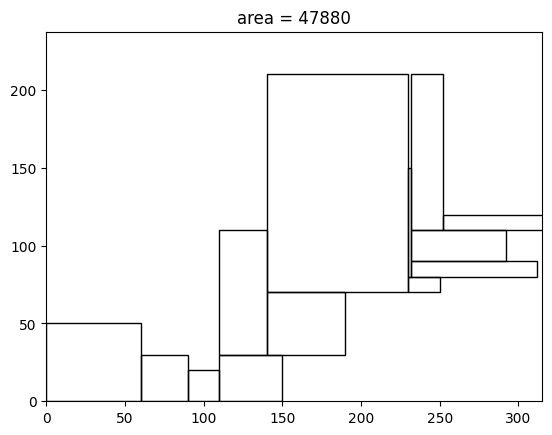

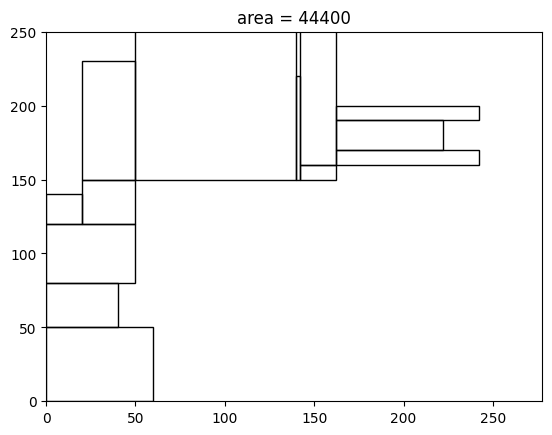

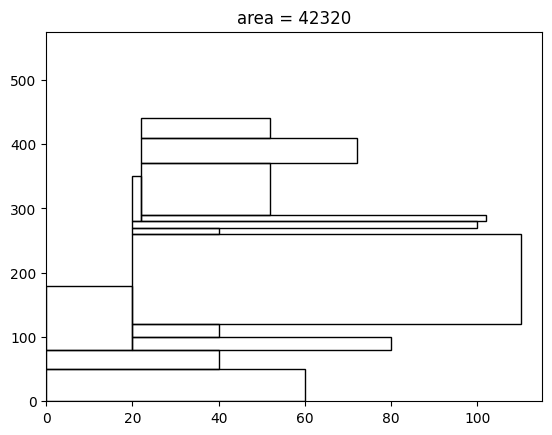

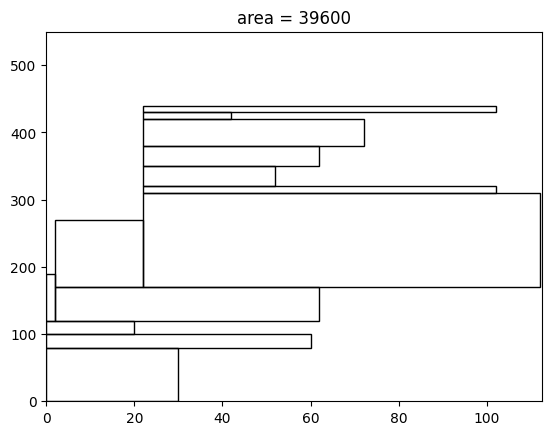

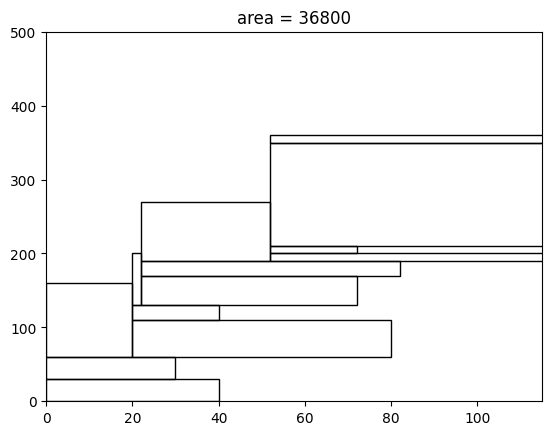

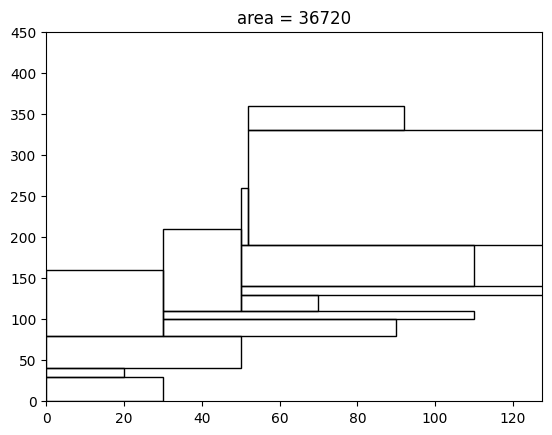

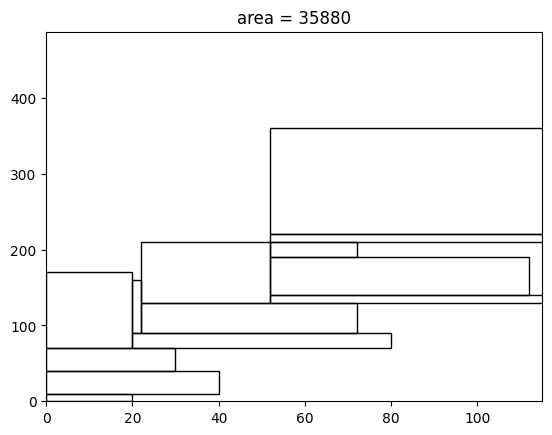

In [ ]:
import sys
from random import randint
import random
import math

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import matplotlib.patches as patches

from datetime import datetime


def Draw( Rects, PE, H, W):
	fig,ax = plt.subplots(1)
	Scale_Factor = 3*math.sqrt(H*W)
	x = 0
	y = 0
	rect = patches.Rectangle((x,y),Rects[PE[0]][0] , Rects[PE[0]][1] , fill= False, label = PE[0])
	ax.add_patch(rect)

	if PE[2] == 'H':
		x = x + Rects[PE[0]][0]
	else:
		y = y + Rects[PE[0]][1]
	rect = patches.Rectangle((x,y),Rects[PE[1]][0] , Rects[PE[1]][1] , fill= False, label = PE[1])
	ax.add_patch(rect)

	if PE[2] == 'H':
		x = x + Rects[PE[1]][0]
	else:
		y = y + Rects[PE[1]][1]

	for i in range(3,len(PE)):
		if PE[i] != 'V' and PE[i] != 'H':
			rect = patches.Rectangle((x,y),Rects[PE[i]][0] , Rects[PE[i]][1] , fill= False, label = PE[i])
			if PE[i + 1] == 'H':
				x = x + Rects[PE[i]][0]
			else:
				y = y + Rects[PE[i]][1]
			ax.add_patch(rect)
	plt.ylim(0, 1.25*W)
	plt.xlim(0, 1.25*H)
	plt.title("area = " + str(H*W))
	plt.savefig(str(H*W) + ".png")
	# plt.show()
	# plt.savefig(str(H*W) + ".png")

def ReadFile():
	file = open('rectangles.txt', 'r')
	lines = file.readlines()
	Rects = {}
	for i in range(len(lines)):
		temp = lines[i].split(' = ')
		name = temp[0]
		values = temp[1].split(',')
		h = int(values[0][1:len(values[0])])
		w = int(values[1][0:len(values[1])- 2])
		Rects[name] = [w,h]
	# print(Rects)
	return Rects
def BallotingProperty(PE):
	Noperands = 0
	Noperators = 0
	for i in range(len(PE)):
		if PE[i] != 'V' and PE[i] != 'H':
			Noperands = Noperands + 1
		else:
			Noperators = Noperators + 1
		if Noperands < Noperators:
			return False
	return True
def CheckNormalPE(PE):
	pos = []
	for i in range(len(PE)):
		if PE[i] == 'V' or PE[i] == 'H':
			pos.append(i)
	# print(pos)
	for i in range(len(pos) - 1):
		if pos[i+1] - pos[i] == 1:
			if PE[pos[i]] == PE[pos[i + 1]]:
				return False

	for i in range(len(pos) - 1):
		if pos[i + 1] - pos[i] > 2:
			return False
	if pos[0] > 2:
		return False
	return True

def CalcCost(Rects, PE):
	H = 0;
	W = 0;
	if PE[2] == 'V':
		W = max(Rects[PE[0]][0], Rects[PE[1]][0])
		H = Rects[PE[0]][1] + Rects[PE[1]][1]
	else:
		H = max(Rects[PE[0]][1], Rects[PE[1]][1])
		W = Rects[PE[0]][0] + Rects[PE[1]][0]
	for i in range(3,len(PE)):
		# print(i)
		if PE[i] == 'V':
			# print(Rects[PE[i-1]])
			W = max(Rects[PE[i-1]][0], W)
			H = Rects[PE[i-1]][1] + H
		elif PE[i] == 'H':
			H = max(Rects[PE[i-1]][1], H)
			W = Rects[PE[i-1]][0] + W
	# print(W)
	# print(H)
	return H*W,W,H

def SwapOandO(PE):
	#Find Operators Positions
	pos = []
	index = 0
	for i in range(len(PE)):
		if PE[i] != 'V' and PE[i] != 'H':
			pos.append(i)
	# print(pos)
	poses = randint(0, len(pos) - 2)
	# print(poses)
	NewPE = PE
	NewPE[pos[poses]], NewPE[pos[poses + 1]] = NewPE[pos[poses + 1]], NewPE[pos[poses]]
	return NewPE

def Complement(PE):
	Len = randint(0, len(PE) - 1)
	NewPE = PE
	# print(NewPE)
	for i in range(Len):
		if NewPE[i] == 'V':
			NewPE[i] = 'H'
		elif NewPE[i] == 'H':
			NewPE[i] = 'V'
	return NewPE
def SwapAandO(PE):
	pos = []
	NewPE = PE
	# print(PE)
	for i in range(len(NewPE)):
		if NewPE[i] == 'V' or NewPE[i] == 'H':
			pos.append(i)
	for i in range(len(pos) - 1):
		if pos[i+1] - pos[i] != 1:
			NewPE[pos[i]], NewPE[pos[i] + 1] = NewPE[pos[i] + 1], NewPE[pos[i]]
			if CheckNormalPE(NewPE) and BallotingProperty(NewPE):
				return True,NewPE
			NewPE[pos[i]], NewPE[pos[i] + 1] = NewPE[pos[i] + 1], NewPE[pos[i]]
			NewPE[pos[i]], NewPE[pos[i] - 1] = NewPE[pos[i] - 1], NewPE[pos[i]]
			if CheckNormalPE(NewPE) and BallotingProperty(NewPE):
				return True,NewPE
			NewPE[pos[i]], NewPE[pos[i] - 1] = NewPE[pos[i] - 1], NewPE[pos[i]]
	return False,PE

def FloorPlaning(Rects, PE, InitialCost, IdealCost, T = 10000.0):

	K = 100
	reject = 0
	bestPE = PE
	bestCost,H,W = CalcCost(Rects,bestPE)
	while reject/K > 0.95 or T > 0.001:
		for i in range(1,K):
			OP = randint(0,2)
			NewPE = []
			if OP == 0:
				NewPE = SwapOandO(PE)
			elif OP == 1:
				NewPE = Complement(PE)
			elif OP == 2:
				res,NewPE = SwapAandO(PE)
				if res == False:
					NewPE = PE
			newCost,H,W = CalcCost(Rects, NewPE)
			n = random.uniform(0.0, 1.0)
			dc = newCost - InitialCost
			if(newCost < InitialCost or n < math.exp(-1 * dc / T)):
				InitialCost = newCost
				# print(newCost/IdealCost)
				PE = NewPE
			else:
				reject = reject + 1
			if(newCost < bestCost):
				print("area / Ideal area 	: ", newCost/IdealCost)
				bestPE = NewPE
				bestCost = newCost
				Draw(Rects, bestPE, H, W)
		# if T > 10:
		T = T * 0.999995

		# print(T)



Rects = ReadFile()

#### Initiate
names = []
for name in Rects:
	names.append(name)
PolishExpersion = [names[0],names[1]]
for i in range(2,len(Rects)):
	PolishExpersion.append('V')
	PolishExpersion.append(names[i])
# PolishExpersion = PolishExpersion + 'V'
PolishExpersion.append('V')

print(PolishExpersion)
IniCost,H,W = CalcCost(Rects, PolishExpersion)
Draw(Rects,PolishExpersion, H, W)
IdealCost = 0
for name in Rects:
	IdealCost = IdealCost + Rects[name][0]*Rects[name][1]
IniCost,H,W = CalcCost(Rects, PolishExpersion)

print("Ideal area 		: ",IdealCost)
print("area / Ideal area 	: ",IniCost/IdealCost)

random.seed(datetime.now())
FloorPlaning(Rects, PolishExpersion, IniCost, IdealCost)